In [66]:
import pandas as pd

peds = pd.read_pickle('peds.pickle')
results_5R = pd.read_pickle('results_5R.pickle')

In [67]:
results_5R["rank"] = results_5R["着順"].map(lambda x:1 if x <4 else 0)
results_5R.drop(["馬名","着順","騎手"],axis=1, inplace=True)

In [68]:
results_m = results_5R.merge(peds, left_on='horse_id', right_index=True, how='left')
results_m.head()

,枠番,馬番,斤量,単勝,人気,horse_id,jockey_id,性,齢,体重,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202001010101,6,6,54.0,16.0,3.0,2018101626,01170,牝,2,438,...,Chieftain,Level Sands,Halo,Wishing Well,Carr de Naskra,Mawgrit,Danzig,Razyana,リアルシャダイ,マックスビューティ
202001010101,2,2,54.0,1.9,2.0,2018105193,05339,牡,2,510,...,Lithiot,Nenana Road,Kalamoun,State Pension,Hornbeam,Priddy Fair,Nearctic,Natalma,Tom Fool,Brazen
202001010101,3,3,54.0,1.8,1.0,2018104800,01032,牡,2,482,...,Welsh Pageant,Electric Flash,Sir Gaylord,Little Hut,Claude,Ribasha,Thatch,Last Call,Mummy's Pet,Goosie-Gantlet
202001010101,1,1,52.0,22.2,4.0,2018102410,01176,牝,2,442,...,Bustino,Zerbinetta,Danzig,Foreign Courier,Ahonoora,Balidaress,Arctic Tern,Beaune,Nureyev,Unite
202001010101,4,4,54.0,55.7,5.0,2018100828,01116,牡,2,426,...,Lithiot,Nenana Road,Nearctic,Natalma,Victoria Park,Lady Angela,Herbager,Silver Sari,Crimson Satan,Bright Prospect


In [69]:
categorical_columns = ['horse_id'] + list(peds.columns) #category型にする列名を指定

In [70]:
from sklearn.preprocessing import LabelEncoder

for column in categorical_columns:
    results_m[column] = LabelEncoder().fit_transform(results_m[column].fillna('Na'))

In [71]:
results_m[categorical_columns]

,horse_id,peds_0,peds_1,peds_2,peds_3,peds_4,peds_5,peds_6,peds_7,peds_8,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202001010101,8763,252,2120,164,368,761,4019,95,167,229,...,56,333,62,370,72,483,87,821,1309,3110
202001010101,10421,336,4795,153,236,748,4438,35,151,6,...,182,415,77,330,178,615,246,668,925,304
202001010101,10170,288,5960,144,394,279,488,74,3,197,...,374,162,154,190,88,670,389,538,560,920
202001010101,9127,223,7311,174,255,346,5448,95,161,155,...,51,645,35,106,9,50,19,89,605,2414
202001010101,8488,444,3240,140,290,748,3515,45,188,202,...,182,415,108,230,451,415,153,930,204,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202010010412,3815,404,2155,87,288,573,4102,57,132,145,...,144,658,61,61,444,524,232,191,630,213
202010010412,2059,306,1393,146,265,71,568,95,178,227,...,49,509,110,288,208,113,260,395,667,662
202010010412,2656,176,4998,136,372,359,2735,102,13,197,...,132,385,108,230,53,755,343,265,341,402
202010010412,3031,232,1982,183,266,349,779,95,189,114,...,284,475,22,335,185,274,172,1039,533,545


In [72]:
results_d = pd.get_dummies(results_m)

In [73]:
for column in categorical_columns:
    results_d[column] = results_d[column].astype('category')

In [74]:
results_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43239 entries, 202001010101 to 202010010412
Columns: 310 entries, 枠番 to ground_state_重
dtypes: category(63), datetime64[ns](1), float64(5), int32(3), int64(3), uint8(235)
memory usage: 20.7+ MB


In [75]:
#関数化
from sklearn.preprocessing import LabelEncoder

def process_categorical(df, target_columns):
    df2 = df.copy()
    for column in target_columns:
        df2[column] = LabelEncoder().fit_transform(df2[column].fillna('Na'))
        
    df2 = pd.get_dummies(df2)
    
    for column in target_columns:
        df2[column] = df2[column].astype('category')
        
    return df2

In [76]:
def split_data(df, test_size=0.3):
    sorted_id_list = df.sort_values('date').index.unique()
    train_id_list = sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list = sorted_id_list[round(len(sorted_id_list)*(1-test_size)):]
    train =df.loc[train_id_list]
    test = df.loc[test_id_list]
    train.drop(['date'],axis=1,inplace=True)
    test.drop(['date'],axis=1,inplace=True)
    return train, test

train, test = split_data(results_d)
X_train = train.drop(['rank'], axis=1)
y_train = train['rank']
X_test = test.drop(['rank'], axis=1)
y_test = test['rank']

In [77]:
import lightgbm as lgb
from sklearn.metrics import roc_curve, roc_auc_score

params = {
    'num_leaves':3, #デフォルトは34
    'n_estimators':70,
    'min_data_in_leaf':300,
    'class_weight':'balanced',
    'random_state':100
}

lgb_clf = lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values, y_train.values) #値に日本語が入っているとエラー

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


LGBMClassifier(class_weight='balanced', min_data_in_leaf=300, n_estimators=70,
               num_leaves=3, random_state=100)

In [91]:
class ModelEvaluator:
    def __init__(self, model, return_table):
        self.model = model
        self.fuku = Return(return_table).fuku
        
    def predict_proba(self, X):
        return self.model.predict_proba(X)[:,1]
    
    def predict(self, X, threshold=0.5):
        y_pred = self.predict_proba(X)
        return [0 if p<threshold else 1 for p in y_pred]
    
    def score(self, y_true, X):
        return roc_auc_score(y_true, self.predict_proba(X))
    
    def feature_importance(self, X, n_display=20):
        importances = pd.DataFrame({'features': X.columns, 'importance': self.model.feature_importances_})
        return importances.sort_values('importance', ascending=False)[:n_display]
    
    def pred_table(self, X, threshold=0.5, bet_only=True):
        pred_table = X.copy()[['馬番']]
        pred_table['pred'] = self.predict(X, threshold)
        if bet_only:
            return pred_table[pred_table['pred']==1]['馬番']
        else:
            return pred_table
        
    def calc_return(self, X, threshold=0.5):
        pred_table = self.pred_table(X, threshold)
        n_bets = len(pred_table)
        money = -100*n_bets
        df = self.fuku.copy()
        df = df.merge(pred_table, left_index=True, right_index=True, how='right')
        for i in range(3):
            money +=df[df['win_{}'.format(i)]==df['馬番']]['return_{}'.format(i)].sum()
        return n_bets, money

In [79]:
return_tables = pd.read_pickle('return_tables.pickle')

class Return:
    def __init__(self, return_tables):
        self.return_tables = return_tables
        
    #複勝行の加工 
    @property
    def fuku(self):
        fuku = self.return_tables[self.return_tables[0] == '複勝'][[1,2]]
        #勝ち馬の馬番
        wins = fuku[1].str.split('br', expand = True).drop([3,4], axis=1)
        wins.columns = ['win_0', 'win_1', 'win_2']
        #払い戻し
        returns = fuku[2].str.split('br', expand = True).drop([3,4], axis=1)
        returns.columns = ['return_0', 'return_1', 'return_2']
        
        df = pd.concat([wins, returns], axis=1)
        for column in df.columns:
            df[column] = df[column].str.replace(',','')
        return df.fillna(0).astype(int)

In [86]:
me = ModelEvaluator(lgb_clf, return_tables)
me.feature_importance(X_test).head(10) 

,features,importance
3,単勝,89
4,人気,9
69,peds_58,5
70,peds_59,4
22,peds_11,4
30,peds_19,3
7,体重,3
37,peds_26,3
16,peds_5,2
15,peds_4,2


In [87]:
from tqdm.notebook import tqdm_notebook as tqdm

gain = {}
n_samples = 100
for i in tqdm((range(n_samples))):
    threshold = i/n_samples
    gain[threshold] = me.calc_return(X_test, threshold)

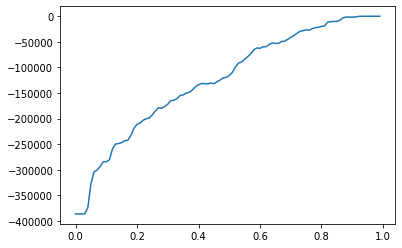

In [88]:
pd.Series(gain).plot()

In [89]:
def gain(return_func, X, n_samples=100, lower=50, min_threshold=0.5): #threshold0.5から1までを１００等分
    gain = {}
    for i in tqdm(range(n_samples)):
        threshold = i/n_samples +min_threshold*(1-i/n_samples)
        n_bets, money =return_func(X, threshold)
        if n_bets>lower:
            gain[n_bets] = (n_bets*100+ money)/(n_bets*100)
    return pd.Series(gain)

In [92]:
me = ModelEvaluator(lgb_clf, return_tables)

In [93]:
gain_data = gain(me.calc_return, X_test)

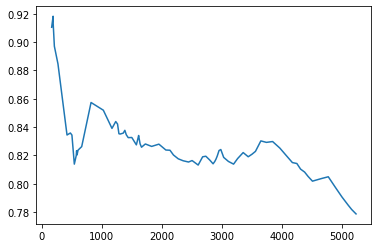

In [94]:
gain_data.plot()

In [44]:
#単勝でも見てみる
return_tables

,0,1,2,3
202010020706,単勝,4,1350,5
202010020706,複勝,4br12br9,470br160br400,8br2br6
202010020706,枠連,2 - 6,2460,7
202010020706,馬連,4 - 12,2630,9
202010020706,ワイド,4 - 12br4 - 9br9 - 12,"890br3,800br930",8br39br10
...,...,...,...,...
202006050804,馬連,6 - 11,610,1
202006050804,ワイド,6 - 11br6 - 9br9 - 11,"280br1,010br1,520",1br9br16
202006050804,馬単,6 → 11,960,1
202006050804,三連複,6 - 9 - 11,3900,9


In [95]:
class Return:
    def __init__(self, return_tables):
        self.return_tables = return_tables
        
    #複勝行の加工 
    @property
    def fuku(self):
        fuku = self.return_tables[self.return_tables[0] == '複勝'][[1,2]]
        #勝ち馬の馬番
        wins = fuku[1].str.split('br', expand = True).drop([3,4], axis=1)
        wins.columns = ['win_0', 'win_1', 'win_2']
        #払い戻し
        returns = fuku[2].str.split('br', expand = True).drop([3,4], axis=1)
        returns.columns = ['return_0', 'return_1', 'return_2']
        
        df = pd.concat([wins, returns], axis=1)
        for column in df.columns:
            df[column] = df[column].str.replace(',','')
        return df.fillna(0).astype(int)
    
    @property
    def tan(self):
        tan = self.return_tables[self.return_tables[0] == '単勝'][[1,2]]
        tan.columns = ['win', 'return']
        
        for column in tan.columns:
            tan[column] = pd.to_numeric(tan[column], errors='coerce')
        return tan

In [96]:
rt = Return(return_tables)

In [97]:
rt.tan

,win,return
202010020706,4.0,1350.0
202010020708,10.0,280.0
202010020709,3.0,180.0
202010020707,3.0,370.0
202010020711,12.0,2020.0
...,...,...
202006050805,12.0,1050.0
202006050801,9.0,1060.0
202006050802,12.0,830.0
202006050803,1.0,200.0


In [98]:
rt.tan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 202010020706 to 202006050804
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   win     933 non-null    float64
 1   return  933 non-null    float64
dtypes: float64(2)
memory usage: 21.9+ KB


In [99]:
#単勝リターンを計算できるようにクラスを修正
class ModelEvaluator:
    def __init__(self, model, return_table):
        self.model = model
        self.fuku = Return(return_table).fuku
        self.tan = Return(return_table).tan
        
    def predict_proba(self, X):
        return self.model.predict_proba(X)[:,1]
    
    def predict(self, X, threshold=0.5):
        y_pred = self.predict_proba(X)
        return [0 if p<threshold else 1 for p in y_pred]
    
    def score(self, y_true, X):
        return roc_auc_score(y_true, self.predict_proba(X))
    
    def feature_importance(self, X, n_display=20):
        importances = pd.DataFrame({'features': X.columns, 'importance': self.model.feature_importances_})
        return importances.sort_values('importance', ascending=False)[:n_display]
    
    def pred_table(self, X, threshold=0.5, bet_only=True):
        pred_table = X.copy()[['馬番']]
        pred_table['pred'] = self.predict(X, threshold)
        if bet_only:
            return pred_table[pred_table['pred']==1]['馬番']
        else:
            return pred_table
        
    def fuku_return(self, X, threshold=0.5):
        pred_table = self.pred_table(X, threshold)
        n_bets = len(pred_table)
        money = -100*n_bets
        df = self.fuku.copy()
        df = df.merge(pred_table, left_index=True, right_index=True, how='right')
        for i in range(3):
            money +=df[df['win_{}'.format(i)]==df['馬番']]['return_{}'.format(i)].sum()
        return n_bets, money
    
    def tan_return(self, X, threshold=0.5):
        pred_table = self.pred_table(X, threshold)
        n_bets = len(pred_table)
        money = -100*n_bets
        df = self.tan.copy()
        df = df.merge(pred_table, left_index=True, right_index=True, how='right')
       
        money +=df[df['win']==df['馬番']]['return'].sum()
        return n_bets, money

In [100]:
me = ModelEvaluator(lgb_clf, return_tables)
me.fuku_return(X_test)

(5240, -115940.0)

In [101]:
me.tan_return(X_test)

(5240, -97870.0)

In [104]:
gain_data = gain(me.tan_return, X_test)

In [105]:
fuku = gain(me.fuku_return, X_test)

In [106]:
fuku

5240    0.778740
5167    0.781866
5108    0.784984
5006    0.790651
4895    0.797508
          ...   
267     0.884644
207     0.897101
187     0.913369
186     0.918280
162     0.910494
Length: 79, dtype: float64

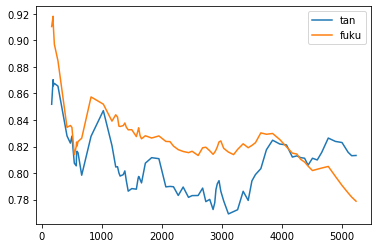

In [107]:
gain_data.rename('tan').plot(legend=True)
fuku.rename('fuku').plot(legend=True)

In [109]:
me.feature_importance(X_test).head(10)

,features,importance
3,単勝,89
4,人気,9
69,peds_58,5
70,peds_59,4
22,peds_11,4
30,peds_19,3
7,体重,3
37,peds_26,3
16,peds_5,2
15,peds_4,2


In [116]:
me.score(y_test,X_test)

0.8097562552089997

In [117]:
#回収率に悪影響を出している可能性のある単勝と人気列を削除してみる

X_train2 = X_train.drop(['単勝','人気'], axis=1)
X_test2 = X_test.drop(['単勝','人気'], axis=1)

In [120]:
import lightgbm as lgb
from sklearn.metrics import roc_curve, roc_auc_score

params = {
    'num_leaves':3, #デフォルトは34
    'n_estimators':70,
    'min_data_in_leaf':300,
    'class_weight':'balanced',
    'random_state':100
}

lgb_clf = lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train2.values, y_train.values) #値に日本語が入っているとエラー

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


LGBMClassifier(class_weight='balanced', min_data_in_leaf=300, n_estimators=70,
               num_leaves=3, random_state=100)

In [121]:
me = ModelEvaluator(lgb_clf, return_tables)
me.score(y_test, X_test2)

0.6767671684570554

In [122]:
tan2 = gain(me.tan_return, X_test2)
fuku2 = gain(me.fuku_return, X_test2)

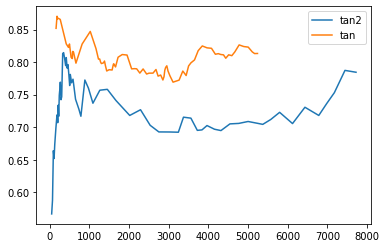

In [126]:
tan2.rename('tan2').plot(legend=True)
gain_data.rename('tan').plot(legend=True)

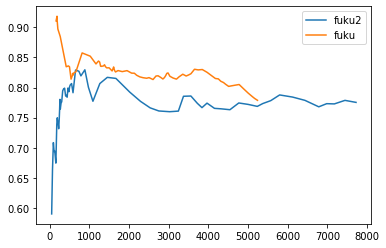

In [127]:
fuku2.rename('fuku2').plot(legend=True)
fuku.rename('fuku').plot(legend=True)

In [129]:
me.feature_importance(X_test2)

,features,importance
8,賞金_ave,34
3,horse_id,26
127,jockey_id_01088,12
214,jockey_id_05339,11
5,体重,10
2,斤量,8
92,jockey_id_01014,7
77,jockey_id_00666,5
7,着順_ave,4
4,齢,3


In [ ]:
#考察
#単勝と人気のデータを説明変数から除外することは、単勝、複勝ともに的中率減少の影響がオッズ上昇の効果を上回り、
#回収率を低下させる結果となった。